In [60]:

import pandas as pd
import numpy as np

In [61]:
train_main_df = pd.read_csv('HW_train_main_data.csv')
train_additional_df = pd.read_csv('train_additional_data.csv')

In [62]:
train_main_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


Найдем топ 10 самых дорогих квартир

In [63]:
ans1 = train_main_df[['id', 'price']].sort_values(by='price', ascending=False)[:10]
ans1['id'].to_list()

[85073, 14154, 88100, 78059, 91175, 45584, 95572, 63901, 92747, 40136]

Найдем топ 5 самых больших по площади квартир

In [64]:
train_main_df[['id', 'full_sq']].sort_values(by='full_sq', ascending=False)[:5]

,id,full_sq
19303,95156,5329
18260,95936,731
6172,32115,639
9283,49518,636
13473,41202,635


количество строк с пропусками в life_sq 29000 - 22935 =

In [65]:
train_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29000 non-null  int64  
 1   timestamp            29000 non-null  object 
 2   full_sq              29000 non-null  int64  
 3   life_sq              22935 non-null  float64
 4   floor                28843 non-null  float64
 5   max_floor            19887 non-null  float64
 6   material             19887 non-null  float64
 7   build_year           16059 non-null  float64
 8   num_room             19887 non-null  float64
 9   kitch_sq             19887 non-null  float64
 10  apartment condition  16088 non-null  float64
 11  sub_area             29000 non-null  int64  
 12  price                29000 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.9+ MB


In [66]:
len(train_main_df[train_main_df['life_sq'].notna() == False])

6065

In [67]:
train_main_df['timestamp'] = pd.to_datetime(train_main_df['timestamp'])
train_main_df['year'] = train_main_df['timestamp'].dt.year
train_main_df['month'] = train_main_df['timestamp'].dt.month
train_main_df['year_month'] = train_main_df['timestamp'].dt.to_period('M')


In [68]:
train_main_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,month,year_month
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0,2014,12,2014-12
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0,2013,6,2013-06
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0,2013,9,2013-09
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0,2013,12,2013-12
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0,2014,2,2014-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,85589,2013-05-08,58,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,101,4330300.0,2013,5,2013-05
28996,11345,2014-04-12,38,NaN,9.0,17.0,1.0,NaN,1.0,1.0,NaN,134,4779900.0,2014,4,2014-04
28997,55519,2013-09-23,55,30.0,9.0,16.0,1.0,2002.0,2.0,8.0,3.0,38,7260000.0,2013,9,2013-09
28998,17196,2013-11-19,37,19.0,3.0,16.0,5.0,1979.0,1.0,9.0,3.0,43,6018000.0,2013,11,2013-11


In [69]:
from matplotlib import pyplot as plt

In [70]:
import seaborn as sns

In [71]:
train_main_df['year_month'] = train_main_df['year_month'].astype(str)

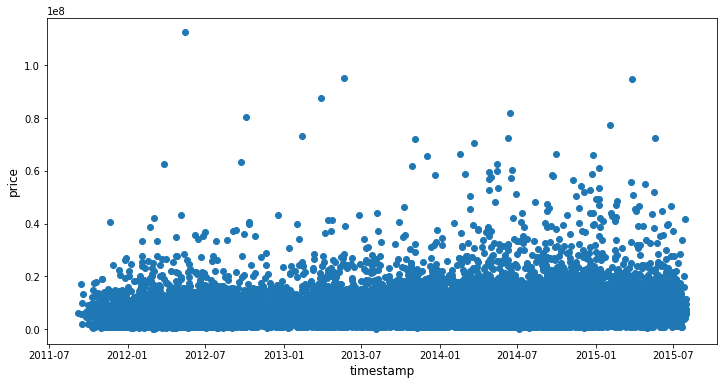

In [72]:
# нарисуем график зависимости цены от даты

plt.figure(figsize=(12, 6))
plt.scatter(train_main_df.timestamp, train_main_df.price)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

Text(0.5, 0, 'year_month')

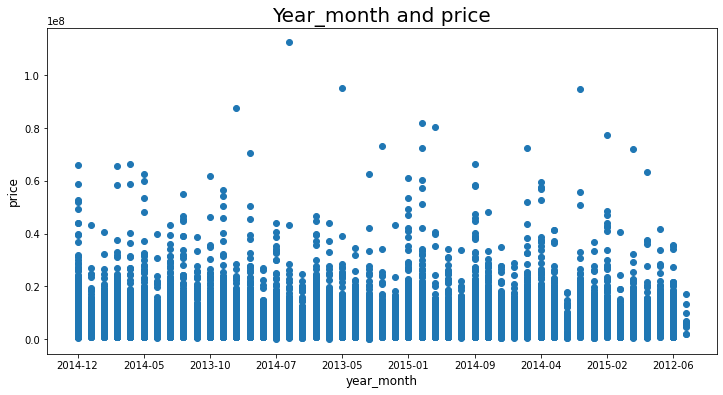

In [73]:
pd.plotting.deregister_matplotlib_converters()
plt.figure(figsize=(12, 6))
plt.title('Year_month and price', fontsize=20)
plt.xticks(np.arange(0, len(train_main_df['year_month'])+1, 5))
plt.scatter(train_main_df['year_month'], train_main_df['price'])
plt.ylabel('price', fontsize=12)
plt.xlabel('year_month', fontsize=12)

Для каждой пары месяц-год найти индексы (не id) самых дорогих квартир.

In [74]:
train_main_df = train_main_df.reset_index()

In [75]:
train_main_df['price_index'] = train_main_df['price']
aggr ={
    'price': lambda x: x.max(),
    'price_index': lambda x: x.idxmax(),
}
df_year = train_main_df.groupby(['year_month']).agg(aggr).reset_index()

In [76]:
df_year

,year_month,price,price_index
0,2011-09,17001000.0,22408
1,2011-10,18043800.0,28566
2,2011-11,40811000.0,24188
3,2011-12,26860200.0,27279
4,2012-01,24576000.0,20316
5,2012-02,38608400.0,27461
6,2012-03,62681400.0,8417
7,2012-04,34816000.0,26644
8,2012-05,112444400.0,18117
9,2012-06,35805000.0,10035


In [77]:
print(df_year['price_index'].to_list())

[22408, 28566, 24188, 27279, 20316, 27461, 8417, 26644, 18117, 10035, 26274, 26321, 9030, 16898, 28806, 7537, 15912, 3163, 26225, 3767, 27095, 14807, 24097, 20799, 20649, 10213, 8788, 20082, 6981, 1740, 7055, 12729, 5582, 15217, 18599, 5942, 28868, 25278, 13329, 2526, 9340, 14321, 5829, 6705, 7755, 12483, 2014]


In [78]:
train_main_df.corr()

,index,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,month,price_index
index,1.000000,-0.007740,-0.002836,-0.006536,-0.006873,-0.012507,0.009636,-0.002914,-0.022539,0.002812,0.001262,-0.004009,-0.003761,0.003320,-0.011307,-0.003761
id,-0.007740,1.000000,0.011015,0.012010,0.000112,-0.011584,0.000259,-0.007040,0.006173,0.005560,0.007588,0.009514,0.006902,-0.012562,0.006288,0.006902
full_sq,-0.002836,0.011015,1.000000,0.390299,0.088004,0.116645,0.034407,-0.005409,0.691535,0.019433,-0.089916,0.015821,0.337113,0.020871,-0.005540,0.337113
life_sq,-0.006536,0.012010,0.390299,1.000000,0.110223,0.112966,0.050486,-0.007568,0.550959,0.007244,-0.173063,0.080838,0.415291,0.040929,-0.001437,0.415291
floor,-0.006873,0.000112,0.088004,0.110223,1.000000,0.454869,-0.010701,0.001240,-0.006587,-0.008726,-0.112670,0.034533,0.117003,-0.014406,0.001930,0.117003
max_floor,-0.012507,-0.011584,0.116645,0.112966,0.454869,1.000000,0.044594,-0.000277,-0.014639,0.019439,-0.071158,0.026302,0.091854,0.009641,-0.004761,0.091854
material,0.009636,0.000259,0.034407,0.050486,-0.010701,0.044594,1.000000,-0.004514,-0.024995,0.038784,-0.030843,-0.007386,0.064922,-0.004280,0.021340,0.064922
build_year,-0.002914,-0.007040,-0.005409,-0.007568,0.001240,-0.000277,-0.004514,1.000000,-0.008433,0.000584,0.301551,-0.011150,0.001452,-0.013658,0.004944,0.001452
num_room,-0.022539,0.006173,0.691535,0.550959,-0.006587,-0.014639,-0.024995,-0.008433,1.000000,0.016693,0.081749,-0.037610,0.475824,0.023331,-0.021686,0.475824
kitch_sq,0.002812,0.005560,0.019433,0.007244,-0.008726,0.019439,0.038784,0.000584,0.016693,1.000000,0.047418,-0.026619,0.027555,-0.004627,-0.007615,0.027555


In [79]:
train_main_df[train_main_df['life_sq'].isna() == True]

,index,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,month,year_month,price_index
6,6,82217,2013-01-14,58,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,94,5431700.0,2013,1,2013-01,5431700.0
7,7,35570,2013-09-19,63,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,72,6214900.0,2013,9,2013-09,6214900.0
8,8,27294,2014-10-25,137,NaN,18.0,18.0,1.0,2014.0,3.0,1.0,1.0,32,20017600.0,2014,10,2014-10,20017600.0
9,9,92932,2015-04-23,73,NaN,2.0,1.0,6.0,NaN,2.0,1.0,NaN,94,8692600.0,2015,4,2015-04,8692600.0
12,12,90487,2013-10-08,64,NaN,1.0,9.0,1.0,NaN,2.0,1.0,NaN,102,4961200.0,2013,10,2013-10,4961200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28982,28982,84395,2013-07-01,61,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,86,5230000.0,2013,7,2013-07,5230000.0
28991,28991,88577,2015-02-10,59,NaN,10.0,17.0,1.0,NaN,2.0,10.0,1.0,69,11028800.0,2015,2,2015-02,11028800.0
28994,28994,91012,2013-06-08,102,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,94,8358500.0,2013,6,2013-06,8358500.0
28995,28995,85589,2013-05-08,58,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,101,4330300.0,2013,5,2013-05,4330300.0


In [80]:
train_main_df_filled = train_main_df.sort_values(by=['full_sq', 'num_room']).reset_index(drop=True)

In [81]:
train_main_df_filled['life_sq'] = train_main_df_filled['life_sq'].fillna(method="ffill")

In [82]:
train_main_df_filled

,index,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,month,year_month,price_index
0,9664,47907,2014-06-01,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,105,4531200.0,2014,6,2014-06,4531200.0
1,25390,86720,2014-11-23,0,77.0,4.0,17.0,1.0,0.0,3.0,0.0,1.0,103,8396100.0,2014,11,2014-11,8396100.0
2,3095,16489,2014-06-13,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,134,6715700.0,2014,6,2014-06,6715700.0
3,6097,69823,2015-01-12,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,71,16529100.0,2015,1,2015-01,16529100.0
4,8028,55095,2014-05-02,1,1.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,105,8688600.0,2014,5,2014-05,8688600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,13473,41202,2014-05-15,635,27.0,3.0,17.0,1.0,NaN,2.0,0.0,NaN,72,6138600.0,2014,5,2014-05,6138600.0
28996,9283,49518,2013-02-12,636,38.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,55,11148600.0,2013,2,2013-02,11148600.0
28997,6172,32115,2014-10-20,639,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,134,5150400.0,2014,10,2014-10,5150400.0
28998,18260,95936,2012-07-16,731,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,133,13753500.0,2012,7,2012-07,13753500.0


In [83]:
train_main_df_filled['price'].corr(train_main_df_filled['full_sq'])

0.3371130874205789

In [84]:
train_main_df['price'].corr(train_main_df['full_sq'])

0.33711308742057877

In [85]:
whole_train = pd.read_csv('HW_train_additional_data.csv')

In [86]:
whole_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29000 non-null  int64  
 1   population                       29000 non-null  int64  
 2   indust_part                      29000 non-null  float64
 3   preschool_facilities             29000 non-null  int64  
 4   school_facilities                29000 non-null  int64  
 5   hospital_beds_raion              15253 non-null  float64
 6   healthcare_facilities            29000 non-null  int64  
 7   university_num                   29000 non-null  int64  
 8   sport_objects_facilities         29000 non-null  int64  
 9   additional_education_facilities  29000 non-null  int64  
 10  culture_objects_facilities       29000 non-null  int64  
 11  shopping_centers_facilities      29000 non-null  int64  
 12  office_num        

In [87]:
whole_train = whole_train.append(train_main_df_filled)

In [88]:
whole_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58000 entries, 0 to 28999
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               58000 non-null  int64         
 1   population                       29000 non-null  float64       
 2   indust_part                      29000 non-null  float64       
 3   preschool_facilities             29000 non-null  float64       
 4   school_facilities                29000 non-null  float64       
 5   hospital_beds_raion              15253 non-null  float64       
 6   healthcare_facilities            29000 non-null  float64       
 7   university_num                   29000 non-null  float64       
 8   sport_objects_facilities         29000 non-null  float64       
 9   additional_education_facilities  29000 non-null  float64       
 10  culture_objects_facilities       29000 non-null  float64  

In [89]:
whole_test = pd.read_csv('HW_test_additional_data.csv')

In [90]:
test = pd.read_csv('HW_test_main_data.csv')

In [91]:
whole_test = whole_test.append(test)

In [92]:
whole_test

,id,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,...,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area
0,30307,247469.0,0.090799,13.0,14.0,NaN,5.0,0.0,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87380,2546.0,0.034656,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12874,4001.0,0.007122,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57688,129207.0,0.007720,6.0,6.0,NaN,0.0,0.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43433,122873.0,0.175055,4.0,4.0,NaN,1.0,0.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.0,NaN,2.0,17.0,1.0,NaN,2.0,1.0,1.0,96.0
996,65212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,45.0,5.0,10.0,1.0,1995.0,3.0,10.0,2.0,60.0
997,11218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,26.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0
998,57238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,33.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [93]:
whole_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58000 entries, 0 to 28999
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               58000 non-null  int64         
 1   population                       29000 non-null  float64       
 2   indust_part                      29000 non-null  float64       
 3   preschool_facilities             29000 non-null  float64       
 4   school_facilities                29000 non-null  float64       
 5   hospital_beds_raion              15253 non-null  float64       
 6   healthcare_facilities            29000 non-null  float64       
 7   university_num                   29000 non-null  float64       
 8   sport_objects_facilities         29000 non-null  float64       
 9   additional_education_facilities  29000 non-null  float64       
 10  culture_objects_facilities       29000 non-null  float64  

In [94]:
train_main_df_filled

,index,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,month,year_month,price_index
0,9664,47907,2014-06-01,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,105,4531200.0,2014,6,2014-06,4531200.0
1,25390,86720,2014-11-23,0,77.0,4.0,17.0,1.0,0.0,3.0,0.0,1.0,103,8396100.0,2014,11,2014-11,8396100.0
2,3095,16489,2014-06-13,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,134,6715700.0,2014,6,2014-06,6715700.0
3,6097,69823,2015-01-12,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,71,16529100.0,2015,1,2015-01,16529100.0
4,8028,55095,2014-05-02,1,1.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,105,8688600.0,2014,5,2014-05,8688600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,13473,41202,2014-05-15,635,27.0,3.0,17.0,1.0,NaN,2.0,0.0,NaN,72,6138600.0,2014,5,2014-05,6138600.0
28996,9283,49518,2013-02-12,636,38.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,55,11148600.0,2013,2,2013-02,11148600.0
28997,6172,32115,2014-10-20,639,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,134,5150400.0,2014,10,2014-10,5150400.0
28998,18260,95936,2012-07-16,731,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,133,13753500.0,2012,7,2012-07,13753500.0


In [216]:
def preprocess(df, col):

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    # df['ts'] = df['timestamp'].astype(int)

    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day_of_week'] = df.timestamp.dt.weekday
    df['week_of_year'] = df.timestamp.dt.weekofyear
    df['timestamp'] = df['timestamp'].astype(np.int64) / 1.1e+17
    df = df.sort_values(by=col).reset_index(drop=True)
    df = df.fillna(method='bfill')
    df = df.fillna(method='ffill')
    df["ratio_life_dash_full_sq"] = df["life_sq"] / df["full_sq"]
    df["ration_kitchen_dash_full_sq"] = df["kitch_sq"] / df["full_sq"]
    df['age'] = df['year'] - df["build_year"]
    df['some_extra_sqr'] = df["full_sq"] - df["life_sq"]
    df = df.fillna(method='bfill')
    df = df.fillna(method='ffill')
    # df = df.fillna(df.mean(), inplace=True)
    return df

In [217]:
train1 = pd.read_csv('HW_train_main_data.csv')
train2 = pd.read_csv('HW_train_additional_data.csv')

In [218]:
train = train1.merge(train2, how='left', on='id')

In [219]:
train.corr()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,...,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
id,1.000000,0.011015,0.012010,0.000112,-0.011584,0.000259,-0.007040,0.006173,0.005560,0.007588,...,-0.000451,-0.002265,-0.002475,0.000649,-0.005993,0.006421,-0.002827,-0.001804,0.001647,-0.006766
full_sq,0.011015,1.000000,0.390299,0.088004,0.116645,0.034407,-0.005409,0.691535,0.019433,-0.089916,...,0.006333,0.025071,0.008910,0.032155,0.018772,-0.010360,0.037538,0.023266,0.000155,0.019999
life_sq,0.012010,0.390299,1.000000,0.110223,0.112966,0.050486,-0.007568,0.550959,0.007244,-0.173063,...,-0.003754,0.087290,0.004698,0.085870,0.049741,0.002298,0.090182,0.086901,-0.007736,0.023761
floor,0.000112,0.088004,0.110223,1.000000,0.454869,-0.010701,0.001240,-0.006587,-0.008726,-0.112670,...,0.045068,0.016578,0.015191,-0.017760,0.027167,0.021678,0.006385,0.028170,0.001154,-0.046103
max_floor,-0.011584,0.116645,0.112966,0.454869,1.000000,0.044594,-0.000277,-0.014639,0.019439,-0.071158,...,0.066349,0.024875,0.025507,-0.018755,0.090617,-0.002710,0.005503,0.019904,0.007737,-0.052727
material,0.000259,0.034407,0.050486,-0.010701,0.044594,1.000000,-0.004514,-0.024995,0.038784,-0.030843,...,-0.061878,-0.013117,-0.058325,0.018403,-0.044852,0.029711,-0.003554,-0.023536,-0.009140,0.028943
build_year,-0.007040,-0.005409,-0.007568,0.001240,-0.000277,-0.004514,1.000000,-0.008433,0.000584,0.301551,...,0.002456,-0.001613,0.002512,0.000521,-0.003447,-0.003792,0.003068,-0.002266,-0.000567,-0.001489
num_room,0.006173,0.691535,0.550959,-0.006587,-0.014639,-0.024995,-0.008433,1.000000,0.016693,0.081749,...,0.018515,0.004498,0.061272,0.040685,-0.037810,-0.010180,0.047110,-0.001175,0.016835,0.071136
kitch_sq,0.005560,0.019433,0.007244,-0.008726,0.019439,0.038784,0.000584,0.016693,1.000000,0.047418,...,-0.003697,-0.020156,0.004434,-0.013887,-0.018677,0.006716,-0.012685,-0.019411,0.004083,0.003353
apartment condition,0.007588,-0.089916,-0.173063,-0.112670,-0.071158,-0.030843,0.301551,0.081749,0.047418,1.000000,...,0.040657,-0.126720,0.117972,-0.056888,-0.153116,-0.043021,-0.053444,-0.127536,0.041694,0.048570


In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29000 entries, 0 to 28999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29000 non-null  int64  
 1   timestamp                        29000 non-null  object 
 2   full_sq                          29000 non-null  int64  
 3   life_sq                          22935 non-null  float64
 4   floor                            28843 non-null  float64
 5   max_floor                        19887 non-null  float64
 6   material                         19887 non-null  float64
 7   build_year                       16059 non-null  float64
 8   num_room                         19887 non-null  float64
 9   kitch_sq                         19887 non-null  float64
 10  apartment condition              16088 non-null  float64
 11  sub_area                         29000 non-null  int64  
 12  price             

In [221]:
train2.head()

,id,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,155572,0.000070,5,5,240.0,1,0,7,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,111874,0.089040,5,5,NaN,0,0,10,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,129207,0.007720,6,6,NaN,0,0,4,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,125354,0.265089,4,5,1937.0,3,0,6,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,111023,0.025609,7,7,240.0,3,0,6,4,0,1,0,0.00,0.00,3,0,0,0


In [222]:
test = pd.read_csv('HW_test_main_data.csv')

In [223]:
tes2 = pd.read_csv('HW_test_additional_data.csv')

In [224]:
test = test.merge(tes2, how='left', on='id')

In [225]:
test = preprocess(test, 'life_sq')


C:\Users\denko\AppData\Local\Temp/ipykernel_20984/1254016806.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.timestamp.dt.weekofyear
C:\Users\denko\AppData\Local\Temp/ipykernel_20984/1254016806.py:10: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['timestamp'] = df['timestamp'].astype(np.int64) / 1.1e+17


In [226]:
train = preprocess(train, 'price')

C:\Users\denko\AppData\Local\Temp/ipykernel_20984/1254016806.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.timestamp.dt.weekofyear
C:\Users\denko\AppData\Local\Temp/ipykernel_20984/1254016806.py:10: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['timestamp'] = df['timestamp'].astype(np.int64) / 1.1e+17


In [227]:
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,mosque,leisure_facilities,year,month,day_of_week,week_of_year,ratio_life_dash_full_sq,ration_kitchen_dash_full_sq,age,some_extra_sqr
0,67278,12.767564,72,37.0,11.0,16.0,1.0,2006.0,2.0,12.0,...,0,0,2014,7,4,27,0.513889,0.166667,8.0,35.0
1,17471,12.096000,38,23.0,9.0,1.0,1.0,2014.0,1.0,1.0,...,0,0,2012,3,3,9,0.605263,0.026316,-2.0,15.0
2,42228,12.096785,47,31.0,7.0,1.0,1.0,2014.0,1.0,1.0,...,0,0,2012,3,4,9,0.659574,0.021277,-2.0,16.0
3,15460,12.505222,41,25.0,1.0,1.0,1.0,2014.0,1.0,1.0,...,0,0,2013,8,6,31,0.609756,0.024390,-1.0,16.0
4,73208,12.240524,32,19.0,5.0,1.0,1.0,2014.0,1.0,1.0,...,0,0,2012,9,5,35,0.593750,0.031250,-2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,91175,12.751855,185,85.0,10.0,47.0,4.0,2004.0,1.0,54.0,...,0,0,2014,6,5,24,0.459459,0.291892,10.0,100.0
28996,78059,12.404684,208,128.0,2.0,5.0,2.0,1927.0,9.0,17.0,...,0,0,2013,3,4,13,0.615385,0.081731,86.0,80.0
28997,88100,12.976495,222,144.0,3.0,5.0,2.0,1927.0,9.0,17.0,...,0,7,2015,3,4,13,0.648649,0.076577,88.0,78.0
28998,14154,12.446313,188,66.0,33.0,5.0,2.0,1927.0,9.0,17.0,...,0,0,2013,5,1,21,0.351064,0.090426,86.0,122.0


In [228]:
from sklearn.model_selection import train_test_split

In [229]:
cols = train.columns[(train.columns != 'price') & (train.columns != 'year_month')]
cols

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'apartment condition',
       'sub_area', 'population', 'indust_part', 'preschool_facilities',
       'school_facilities', 'hospital_beds_raion', 'healthcare_facilities',
       'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities',
       'year', 'month', 'day_of_week', 'week_of_year',
       'ratio_life_dash_full_sq', 'ration_kitchen_dash_full_sq', 'age',
       'some_extra_sqr'],
      dtype='object')

In [230]:
X_train, X_test, y_train, y_test = train_test_split(
    train[cols],
    train.price, test_size=1425, random_state=42)

In [231]:
train[train['ratio_life_dash_full_sq'].isna() == True]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,mosque,leisure_facilities,year,month,day_of_week,week_of_year,ratio_life_dash_full_sq,ration_kitchen_dash_full_sq,age,some_extra_sqr


In [232]:
test.year.value_counts()

2014    439
2013    277
2012    152
2015    114
2011     18
Name: year, dtype: int64

In [233]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29000 non-null  int64  
 1   timestamp                        29000 non-null  float64
 2   full_sq                          29000 non-null  int64  
 3   life_sq                          29000 non-null  float64
 4   floor                            29000 non-null  float64
 5   max_floor                        29000 non-null  float64
 6   material                         29000 non-null  float64
 7   build_year                       29000 non-null  float64
 8   num_room                         29000 non-null  float64
 9   kitch_sq                         29000 non-null  float64
 10  apartment condition              29000 non-null  float64
 11  sub_area                         29000 non-null  int64  
 12  price             

In [234]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [235]:
import xgboost as xgb

In [236]:
train.tail()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,mosque,leisure_facilities,year,month,day_of_week,week_of_year,ratio_life_dash_full_sq,ration_kitchen_dash_full_sq,age,some_extra_sqr
28995,91175,12.751855,185,85.0,10.0,47.0,4.0,2004.0,1.0,54.0,...,0,0,2014,6,5,24,0.459459,0.291892,10.0,100.0
28996,78059,12.404684,208,128.0,2.0,5.0,2.0,1927.0,9.0,17.0,...,0,0,2013,3,4,13,0.615385,0.081731,86.0,80.0
28997,88100,12.976495,222,144.0,3.0,5.0,2.0,1927.0,9.0,17.0,...,0,7,2015,3,4,13,0.648649,0.076577,88.0,78.0
28998,14154,12.446313,188,66.0,33.0,5.0,2.0,1927.0,9.0,17.0,...,0,0,2013,5,1,21,0.351064,0.090426,86.0,122.0
28999,85073,12.154909,57,31.0,12.0,5.0,2.0,1927.0,9.0,17.0,...,0,0,2012,5,1,20,0.543860,0.298246,85.0,26.0


In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train)

ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
train['timestamp'] = scaler.fit_transform(train['timestamp'])

In [ ]:
xgb_train = xgb.DMatrix(X_train, y_train, feature_names = cols, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, feature_names = cols, enable_categorical=True)

In [ ]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [ ]:
model_2 = xgb.train(params = xgb_params,
                    dtrain = xgb_train,
                    num_boost_round = 300,
                    evals = evallist,
                    early_stopping_rounds = 10,
                    verbose_eval = 10)